### Import python libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data=pd.read_csv('students_dataset.csv')
data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,10-May,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,10-May,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,10-May,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,10-May,82,90,93


In [44]:
data.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [45]:
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


### To find null values

In [47]:
data.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### drop unnamed column

In [48]:
data=data.drop("Unnamed: 0", axis=1)
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75


### change weekly study hours

In [49]:
group=data.groupby('WklyStudyHours')

In [50]:
group.get_group('10-May')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,10-May,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,10-May,85,93,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,10-May,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,10-May,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,10-May,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,10-May,82,90,93


In [51]:
data["WklyStudyHours"]=data["WklyStudyHours"].str.replace("10-May","5-8")

In [52]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-8,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-8,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-8,76,78,75


### Gender Distribution

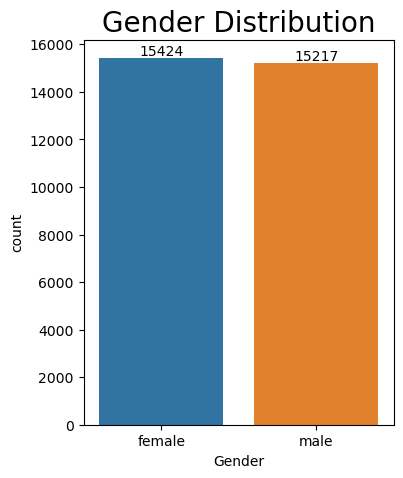

In [53]:
plt.figure(figsize=(4,5)) ## to set the size of the figure use "figsize"
c=sns.countplot(data=data,x='Gender')
c.bar_label(c.containers[0])
plt.title("Gender Distribution",size=20)
plt.show()

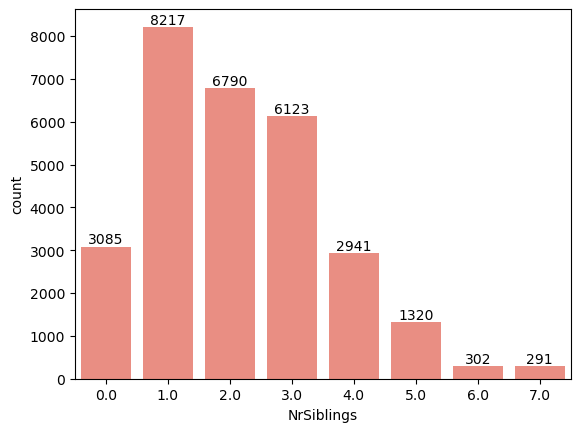

In [96]:
y=sns.countplot(data=data,x='NrSiblings',color='salmon')
y.bar_label(y.containers[0])
plt.show()

###### From the above chart we have analysed that:-the number of females in the data is more than the number of males

### Impact of parent_education on students score

In [54]:
grp=data.groupby('ParentEduc').agg({'MathScore':'mean',
    'ReadingScore':'mean','WritingScore':'mean'})
print(grp)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


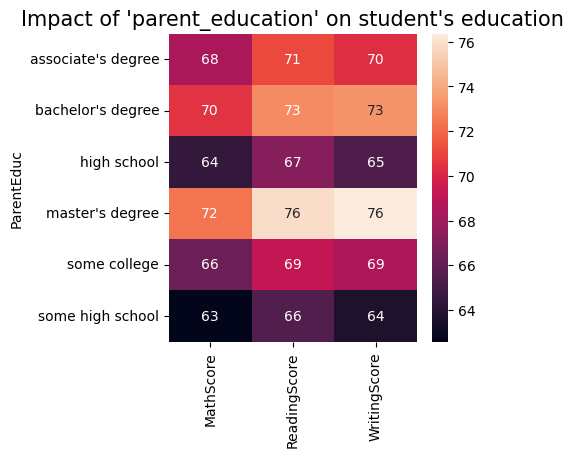

In [55]:
plt.figure(figsize=(4,4))
sns.heatmap(grp,annot=True) ## to show the value on heatmap use "annot=True"
plt.title("Impact of 'parent_education' on student's education",size=15)
plt.show()

###### From the above chart we have concluded that the educated parents have the good impact on students score

### Impact of ''ParentMaritalStatus'' on student score

In [56]:
grp1=data.groupby('ParentMaritalStatus').agg({'MathScore':'mean',
    'ReadingScore':'mean','WritingScore':'mean'})
print(grp1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


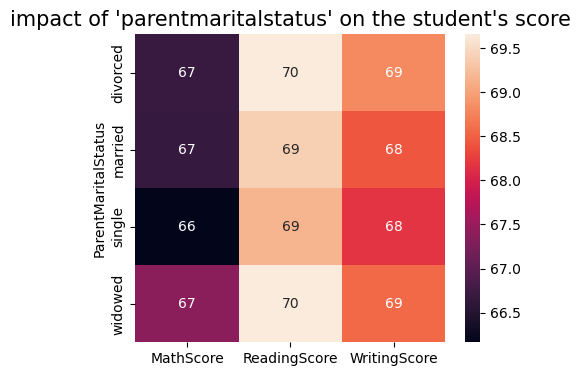

In [57]:
plt.figure(figsize=(5,4))
sns.heatmap(grp1,annot=True) ## to show the value on heatmap use "annot=True"
plt.title("impact of 'parentmaritalstatus' on the student's score",size=15)
plt.show()

###### From the above chart we have concluded that there is negligible impact on the student's score due to their parentmaritalstatus

## Boxplot

In [58]:
data['MathScore'].mean()

66.5584021409223

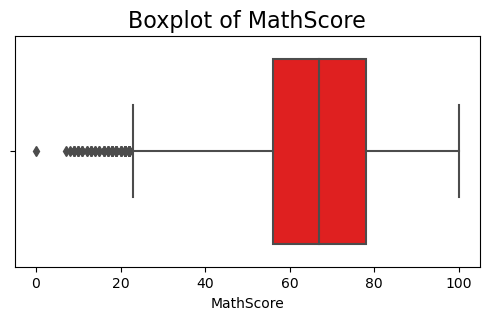

In [59]:
plt.figure(figsize=(6,3))
sns.boxplot(data=data,x='MathScore',color='red')
plt.title('Boxplot of MathScore',size=16)
plt.show()

In [60]:
data['ReadingScore'].mean()

69.37753337032082

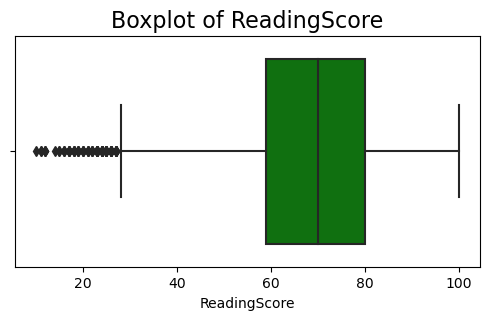

In [61]:
plt.figure(figsize=(6,3))
sns.boxplot(data=data,x='ReadingScore',color='green')
plt.title('Boxplot of ReadingScore',size=16)
plt.show()

In [62]:
data['WritingScore'].mean()

68.41862210763357

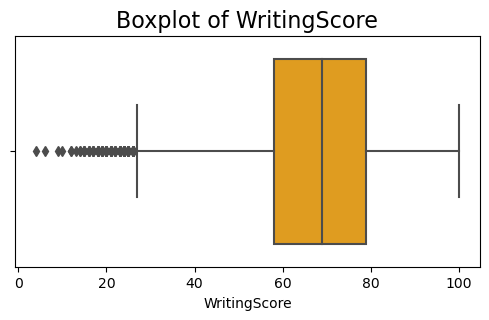

In [63]:
plt.figure(figsize=(6,3))
sns.boxplot(data=data,x='WritingScore',color='orange')
plt.title('Boxplot of WritingScore',size=16)
plt.show()

##### From the above boxplots we conclude that student are comparitively weak in maths

## Distribution of Ethnic_Group

In [64]:
print(data['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [65]:
groupA=data.loc[(data['EthnicGroup']=='group A'),'EthnicGroup']

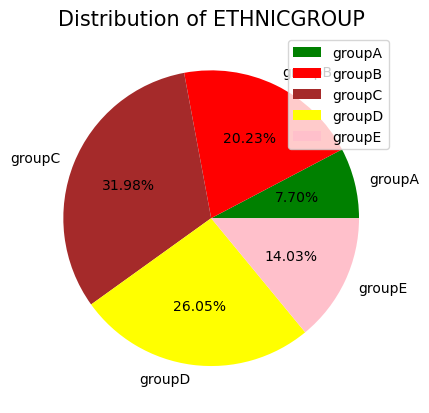

In [66]:
##### for percentage distribution we often use piechart to visualize data

groupA=data.loc[(data['EthnicGroup']=='group A'),'EthnicGroup'].count()
groupB=data.loc[(data['EthnicGroup']=='group B'),'EthnicGroup'].count()
groupC=data.loc[(data['EthnicGroup']=='group C'),'EthnicGroup'].count()
groupD=data.loc[(data['EthnicGroup']=='group D'),'EthnicGroup'].count()
groupE=data.loc[(data['EthnicGroup']=='group E'),'EthnicGroup'].count()
lst=[groupA,groupB,groupC,groupD,groupE]
label=['groupA','groupB','groupC','groupD','groupE']
col=['g','r','brown','yellow','pink']
plt.pie(lst,labels=label,autopct='%1.2f%%',colors=col)
plt.title('Distribution of ETHNICGROUP',size=15)
plt.legend()
plt.show()

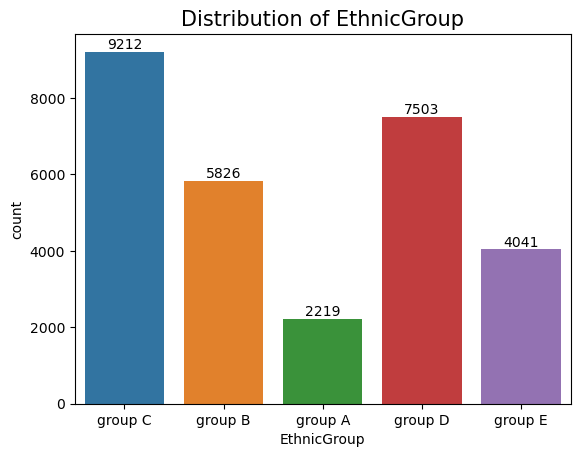

In [67]:
c=sns.countplot(data=data,x='EthnicGroup')
c.bar_label(c.containers[0])
plt.title('Distribution of EthnicGroup',size=15)
plt.show()

In [68]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-8,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-8,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-8,76,78,75


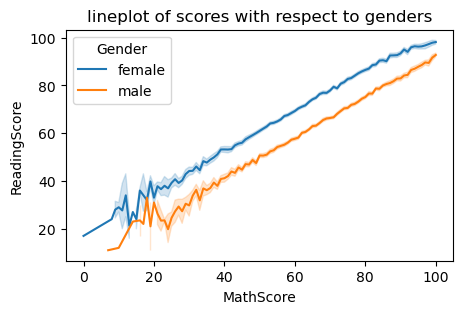

In [69]:
plt.figure(figsize=(5,3))
lp=sns.lineplot(data=data,x='MathScore',y='ReadingScore',hue='Gender')
plt.title('lineplot of scores with respect to genders')
lp
plt.show()


In [70]:
data.head(1)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74


In [71]:
x=data['PracticeSport'].unique()
print(x)

['regularly' 'sometimes' 'never' nan]


In [72]:
grp3=data.groupby('PracticeSport').agg({'MathScore':'mean',
    'ReadingScore':'mean','WritingScore':'mean'})
print(grp3)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


## Impact of praticesport on student's score

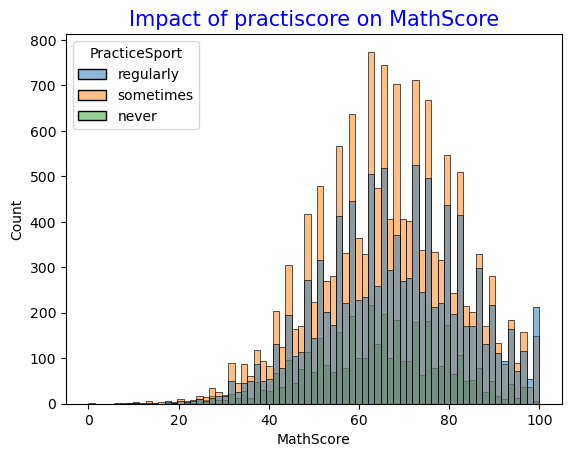

In [81]:
sns.histplot(data=data,x='MathScore',hue='PracticeSport')
plt.title('Impact of practisport on MathScore',size=15,color='blue')
plt.show()

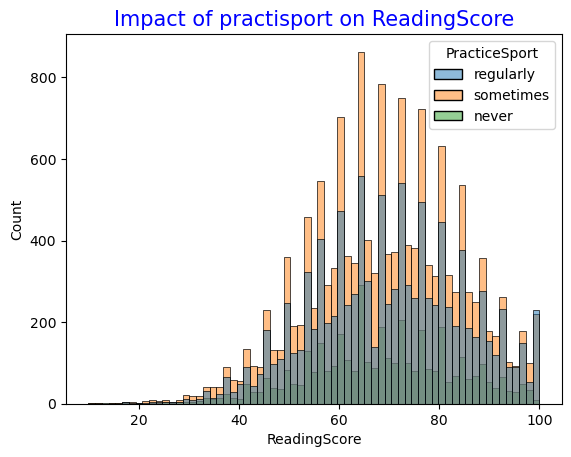

In [84]:
sns.histplot(data=data,x='ReadingScore',hue='PracticeSport')
plt.title('Impact of practisport on ReadingScore',size=15,color='blue')
plt.show()

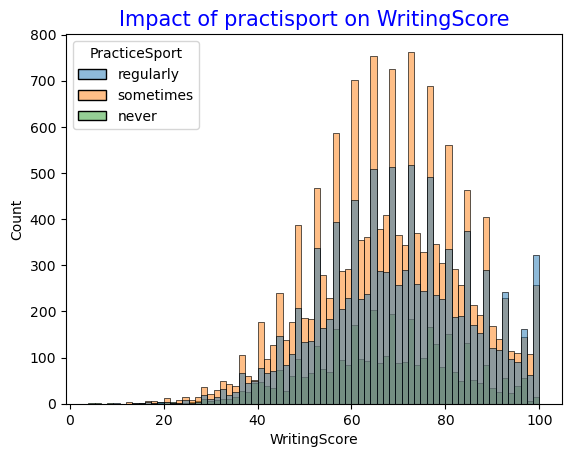

In [85]:
sns.histplot(data=data,x='WritingScore',hue='PracticeSport')
plt.title('Impact of practisport on WritingScore',size=15,color='blue')
plt.show()

In [86]:
x=data['PracticeSport'].unique()
print(x)

['regularly' 'sometimes' 'never' nan]


In [87]:
grp3=data.groupby('PracticeSport').agg({'MathScore':'mean',
    'ReadingScore':'mean','WritingScore':'mean'})
print(grp3)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


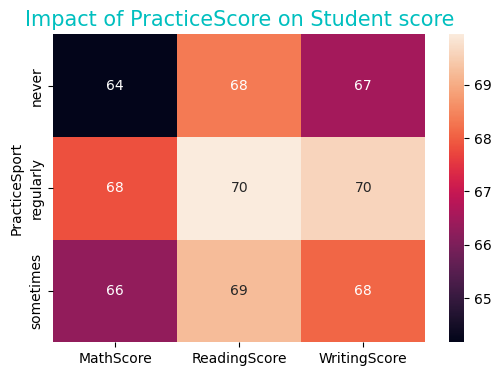

In [92]:
plt.figure(figsize=(6,4))
sns.heatmap(grp3,annot=True)
plt.title('Impact of PracticeScore on Student score',size=15,color='c')
plt.show()

###### We can see that heatmap gives us better visualisation as compared to histplot